In [16]:
import pandas as pd
import glob

# Get all .csv files from the DDBB folder
csv_files = glob.glob('DDBB2/*.csv')

# Read each .csv file into a DataFrame and store them in a list
dataframes = [pd.read_csv(file) for file in csv_files]

dataframesCensus = [pd.read_csv(file) for file in glob.glob('DDBB2/CensusDB/*.csv')]

df_1970_2022_presidential = dataframes[0]
df_1970_2022_senate = dataframes[1]
df_1970_2022_house = dataframes[2]

# Get all dataframes from the CensusDB folder
Alabama = dataframesCensus[0]
Alaska = dataframesCensus[1]
Arizona = dataframesCensus[2]
Arkansas = dataframesCensus[3]
California = dataframesCensus[4]
Colorado = dataframesCensus[5]
Connecticut = dataframesCensus[6]
Delaware = dataframesCensus[7]
Florida = dataframesCensus[8]
Georgia = dataframesCensus[9]
Hawaii = dataframesCensus[10]
Idaho = dataframesCensus[11]
Illinois = dataframesCensus[12]
Indiana = dataframesCensus[13]
Iowa = dataframesCensus[14]
Kansas = dataframesCensus[15]
Kentucky = dataframesCensus[16]
Louisiana = dataframesCensus[17]
Maine = dataframesCensus[18]
Maryland = dataframesCensus[19]
Massachusetts = dataframesCensus[20]
Michigan = dataframesCensus[21]
Minnesota = dataframesCensus[22]
Mississippi = dataframesCensus[23]
Missouri = dataframesCensus[24]
Montana = dataframesCensus[25]
Nebraska = dataframesCensus[26]
Nevada = dataframesCensus[27]
NewHampshire = dataframesCensus[28]
NewJersey = dataframesCensus[29]
NewMexico = dataframesCensus[30]
NewYork = dataframesCensus[31]
NorthCarolina = dataframesCensus[32]
NorthDakota = dataframesCensus[33]
Ohio = dataframesCensus[34]
Oklahoma = dataframesCensus[35]
Oregon = dataframesCensus[36]
Pennsylvania = dataframesCensus[37]
RhodeIsland = dataframesCensus[38]
SouthCarolina = dataframesCensus[39]
SouthDakota = dataframesCensus[40]
Tennessee = dataframesCensus[41]
Texas = dataframesCensus[42]
Utah = dataframesCensus[43]
Vermont = dataframesCensus[44]
Virginia = dataframesCensus[45]
Washington = dataframesCensus[46]
WestVirginia = dataframesCensus[47]
Wisconsin = dataframesCensus[48]
Wyoming = dataframesCensus[49]


In [17]:
# List of districts for each state
districts = [7, 0, 1, 2, 50, 6, 5, 0, 26, 6, 1, 2, 6, 5, 3, 3, 6, 2, 2, 6, 9, 8, 2, 2, 2, 1, 2, 3, 1, 7, 2, 22, 9, 0, 1, 5, 4, 8, 2, 1, 0, 5, 23, 4, 0, 7, 8, 2, 3, 0]

# List of state names in alphabetical order
state_names = ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']

# Initialize an empty list to store the data for each district
data_list = []

# Iterate over the states and their corresponding districts
for state_name, district in zip(state_names, districts):
    # Filter the data for the required district and year
    # Determine the last available year for the specific state in the df_1970_2022_senate DataFrame
    last_year_senate = df_1970_2022_senate[df_1970_2022_senate['state'] == state_name]['year'].max()
    last_year_house = df_1970_2022_house[df_1970_2022_house['state'] == state_name]['year'].max()
    last_year_presidential = df_1970_2022_presidential[df_1970_2022_presidential['state'] == state_name]['year'].max()


    # Filter the data for the required district and year
    senate_district = df_1970_2022_senate[
        (df_1970_2022_senate['year'] == last_year_senate) & 
        (df_1970_2022_senate['state'] == state_name)
    ]
    house_district = df_1970_2022_house[
        (df_1970_2022_house['year'] == last_year_house) & 
        (df_1970_2022_house['state'] == state_name) & 
        (df_1970_2022_house['district'] == district)
    ]
    
    presidential_district = df_1970_2022_presidential[
        (df_1970_2022_presidential['year'] == last_year_presidential) & 
        (df_1970_2022_presidential['state'] == state_name)
    ]


    # Create a new DataFrame with the specified columns
    data = {
        'district': [f'{senate_district.iloc[0]["state_po"]} {district}'],
        'senate_candidate1': [senate_district.iloc[0]['candidatevotes']],
        'senate_candidate2': [senate_district.iloc[1]['candidatevotes']],
        'senate_total_votes': [senate_district.iloc[0]['totalvotes']],
        'house_democrat': [house_district[house_district['party'] == 'DEMOCRAT']['candidatevotes'].values[0]] if not house_district[house_district['party'] == 'DEMOCRAT'].empty else [None],
        'house_republican': [house_district[house_district['party'] == 'REPUBLICAN']['candidatevotes'].values[0]] if not house_district[house_district['party'] == 'REPUBLICAN'].empty else [None],
        'house_total_votes': [house_district['totalvotes'].values[0]] if not house_district.empty else [None],
        'presidential_democrat': [presidential_district[presidential_district['party_detailed'] == 'DEMOCRAT']['candidatevotes'].values[0]] if not presidential_district[presidential_district['party_detailed'] == 'DEMOCRAT'].empty else [None],
        'presidential_republican': [presidential_district[presidential_district['party_detailed'] == 'REPUBLICAN']['candidatevotes'].values[0]] if not presidential_district[presidential_district['party_detailed'] == 'REPUBLICAN'].empty else [None],
        'presidential_total_votes': [presidential_district['totalvotes'].values[0]] if not presidential_district.empty else [None]
    }

    # Convert the dictionary to a DataFrame and append it to the list
    data_list.append(pd.DataFrame(data))

# Concatenate all the DataFrames in the list to create the final DataFrame
final_df = pd.concat(data_list, ignore_index=True)

final_df

,district,senate_candidate1,senate_candidate2,senate_total_votes,house_democrat,house_republican,house_total_votes,presidential_democrat,presidential_republican,presidential_total_votes
0,AL 7,920478,1392076,2316445,123233,67416,193940,849624,1441170,2323282
1,AK 0,146068,16806,354587,128553,67866,263610,153778,189951,359530
2,AZ 1,28,1637661,3355307,179141,182336,361477,1672143,1661686,3387326
3,AR 2,399390,793871,1193261,86887,147975,246446,423932,760647,1219069
4,CA 50,6019422,5093942,11113364,168816,99819,268635,11110250,6006429,17500881
5,CO 6,1731114,1429492,3235790,170140,105084,280755,1804352,1364607,3279980
6,CT 5,787685,545717,1386840,123818,123342,253672,1080831,714717,1823857
7,DE 0,291804,186054,490935,178416,138201,321649,296268,200603,504346
8,FL 26,4099505,4089472,8190005,58868,143240,202108,5297045,5668731,11067456
9,GA 6,2194848,2288446,4483294,125612,206886,332498,2473633,2461854,4999960


In [18]:
# Dataframes of each state
dataframesCensus = [pd.read_csv(file) for file in glob.glob('DDBB2/CensusDB/*.csv')]

# I want to get the same data from each dataframe
# Define a list to store the results
results = []


relevant_topics = [
    ("People", "Place of Birth", "Native"),
    ("Workers", "Employment Status", "Unemployment Rate"),
    ("Socioeconomic", "Income and Benefits (In 2023 inflation-adjusted dollars)", "Mean household income (dollars)"),
    ("Socioeconomic", "Percentage of Families and People Whose Income in the Past 12 Months is Below the Poverty Level", "All families"),
    ("Education", "Educational Attainment", "Graduate or professional degree"),
    ("People", "Hispanic or Latino and Race", "Total population"),
    ("People", "Sex and Age", "Male"),
    ("People", "Sex and Age", "Female")
]

# Iterate over each dataframe in dataframesCensus and also iterate from districts to get 1 number per state
for df, state_name, district in zip(dataframesCensus, state_names, districts):
    if district == 0:
        district = '(At Large)'
    
    # if it is a number of just 1 digit, add a 0 before it
    if len(str(district)) == 1:
        district = f'0{district}'

    # Filter the data to only include the relevant topics   
    filtered_data = df[
        df.apply(lambda row: (row['Topic'], row['Subject'], row['Title']) in relevant_topics, axis=1)
    ]

    # Extract the relevant columns and rename them for clarity
    filtered_data = filtered_data[['Title', f'District {district} Estimate']].rename(columns={'Title': 'Metric', f'District {district} Estimate': state_name})

    # Convert the filtered DataFrame to a dictionary
    data_dict = filtered_data.set_index('Metric').to_dict()[state_name]

    # Add the state name and district to the dictionary
    data_dict['State'] = state_name
    data_dict['District'] = district

    # Append the dictionary to the results list
    results.append(data_dict)

print(results)

    

[{'Male': '338,340', 'Female': '376,792', 'Total population': '715,132', 'Native': '688,852', 'Unemployment Rate': '6.2', 'Mean household income (dollars)': '68,392', 'All families': '17.1', 'Graduate or professional degree': '44,204', 'State': 'ALABAMA', 'District': '07'}, {'Male': '385,855', 'Female': '347,551', 'Total population': '733,406', 'Native': '678,835', 'Unemployment Rate': '4.8', 'Mean household income (dollars)': '114,201', 'All families': '7.2', 'Graduate or professional degree': '60,116', 'State': 'ALASKA', 'District': '(At Large)'}, {'Male': '393,913', 'Female': '410,343', 'Total population': '804,256', 'Native': '700,868', 'Unemployment Rate': '3.6', 'Mean household income (dollars)': '146,662', 'All families': '6.2', 'Graduate or professional degree': '123,560', 'State': 'ARIZONA', 'District': '01'}, {'Male': '375,240', 'Female': '398,787', 'Total population': '774,027', 'Native': '742,344', 'Unemployment Rate': '3.1', 'Mean household income (dollars)': '89,344', 'Al

In [19]:
# Convert the results list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Add the new columns to final_df
final_df['Native People'] = results_df['Native']
final_df['Unemployment Rate'] = results_df['Unemployment Rate']
final_df['Mean household income'] = results_df['Mean household income (dollars)']
final_df['Families income below poverty'] = results_df['All families']
final_df['Graduate or professional degree'] = results_df['Graduate or professional degree']
final_df['Hispanic'] = results_df['Total population']
final_df['Male'] = results_df['Male']
final_df['Female'] = results_df['Female']


final_df

,district,senate_candidate1,senate_candidate2,senate_total_votes,house_democrat,house_republican,house_total_votes,presidential_democrat,presidential_republican,presidential_total_votes,Native People,Unemployment Rate,Mean household income,Families income below poverty,Graduate or professional degree,Hispanic,Male,Female
0,AL 7,920478,1392076,2316445,123233,67416,193940,849624,1441170,2323282,"688,852",6.2,"68,392",17.1,"44,204","715,132","338,340","376,792"
1,AK 0,146068,16806,354587,128553,67866,263610,153778,189951,359530,"678,835",4.8,"114,201",7.2,"60,116","733,406","385,855","347,551"
2,AZ 1,28,1637661,3355307,179141,182336,361477,1672143,1661686,3387326,"700,868",3.6,"146,662",6.2,"123,560","804,256","393,913","410,343"
3,AR 2,399390,793871,1193261,86887,147975,246446,423932,760647,1219069,"742,344",3.1,"89,344",10.2,"67,783","774,027","375,240","398,787"
4,CA 50,6019422,5093942,11113364,168816,99819,268635,11110250,6006429,17500881,"607,938",4.3,"163,873",5.2,"149,338","781,251","391,721","389,530"
5,CO 6,1731114,1429492,3235790,170140,105084,280755,1804352,1364607,3279980,"601,291",4.2,"128,029",7.8,"86,219","730,351","365,004","365,347"
6,CT 5,787685,545717,1386840,123818,123342,253672,1080831,714717,1823857,"591,990",4.9,"120,160",9.2,"86,673","722,450","357,201","365,249"
7,DE 0,291804,186054,490935,178416,138201,321649,296268,200603,504346,"916,761",3.5,"109,486",7.4,"113,137","1,031,890","498,994","532,896"
8,FL 26,4099505,4089472,8190005,58868,143240,202108,5297045,5668731,11067456,"358,233",3.4,"101,429",10.7,"65,444","809,482","403,057","406,425"
9,GA 6,2194848,2288446,4483294,125612,206886,332498,2473633,2461854,4999960,"639,147",2.7,"162,199",3.7,"124,698","797,492","394,471","403,021"


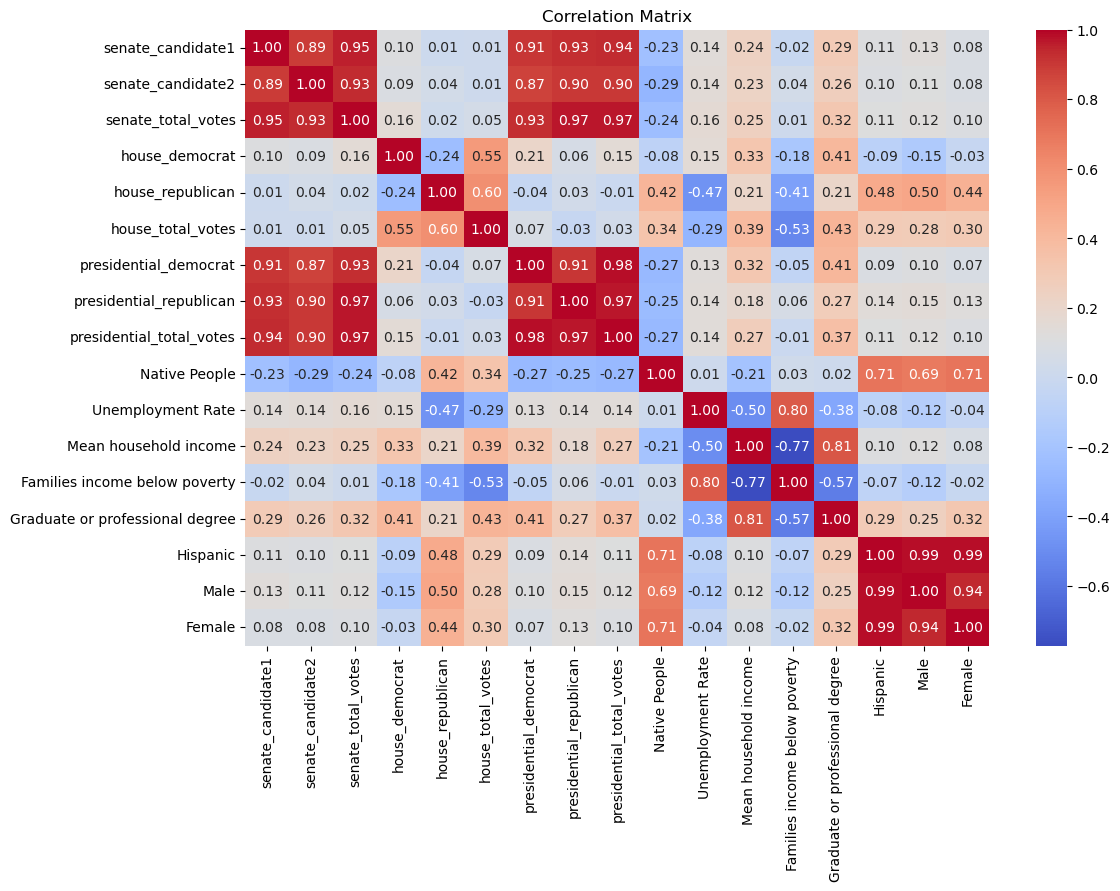

In [21]:
# Print the type of each column
import seaborn as sns

final_df['district'] = final_df['district'].astype(str)
final_df['house_democrat'] = final_df['house_democrat'].fillna(0).astype('int64')
final_df['Native People'] = final_df['Native People'].astype(str).str.replace(',', '').astype(float)
final_df['Unemployment Rate'] = final_df['Unemployment Rate'].astype(float)
final_df['Mean household income'] = final_df['Mean household income'].astype(str).str.replace(',', '').astype(float)
final_df['Families income below poverty'] = final_df['Families income below poverty'].astype(float)
final_df['Graduate or professional degree'] = final_df['Graduate or professional degree'].astype(str).str.replace(',', '').astype(float)
final_df['Hispanic'] = final_df['Hispanic'].astype(str).str.replace(',', '').astype(float)
final_df['Male'] = final_df['Male'].astype(str).str.replace(',', '').astype(float)
final_df['Female'] = final_df['Female'].astype(str).str.replace(',', '').astype(float)


# Drop the 'district' column for correlation matrix calculation
corr_matrix = final_df.drop(columns=['district']).corr()

final_df.to_csv('final_df.csv', index=False)
corr_matrix.to_csv('corr_matrix.csv', index=False)

# Display the correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight', transparent = True)

plt.show()